# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import csv

# Load JSON file

In [2]:
import pandas as pd
df = pd.read_json (r'iris.json')
df2=df.to_csv (r'iris_test.csv', index = None)

In [3]:
df

,session_name,session_description,design_state_data
algorithms,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
feature_generation,test,test,"{'linear_interactions': [['petal_length', 'sep..."
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
feature_reduction,test,test,"{'feature_reduction_method': 'Tree-based', 'nu..."
hyperparameters,test,test,"{'stratergy': 'Grid Search', 'shuffle_grid': T..."
metrics,test,test,"{'optomize_model_hyperparameters_for': 'AUC', ..."
probability_calibration,test,test,{'probability_calibration_method': 'Sigmoid - ...
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Regression', 'target': 'p..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."


# Load CSV file

In [4]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA on CSV file

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Turn categorical variables into numbers and fill missing
for label, content in iris.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        iris['species'] = pd.Categorical(content).codes+1

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [9]:
# Class proportion
class_counts = iris.groupby('species').size()
print(class_counts)

species
1    50
2    50
3    50
dtype: int64


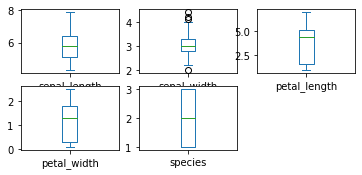

In [10]:
# Box and Whisker Plots
import matplotlib.pyplot as plt

iris.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11972\3274115535.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


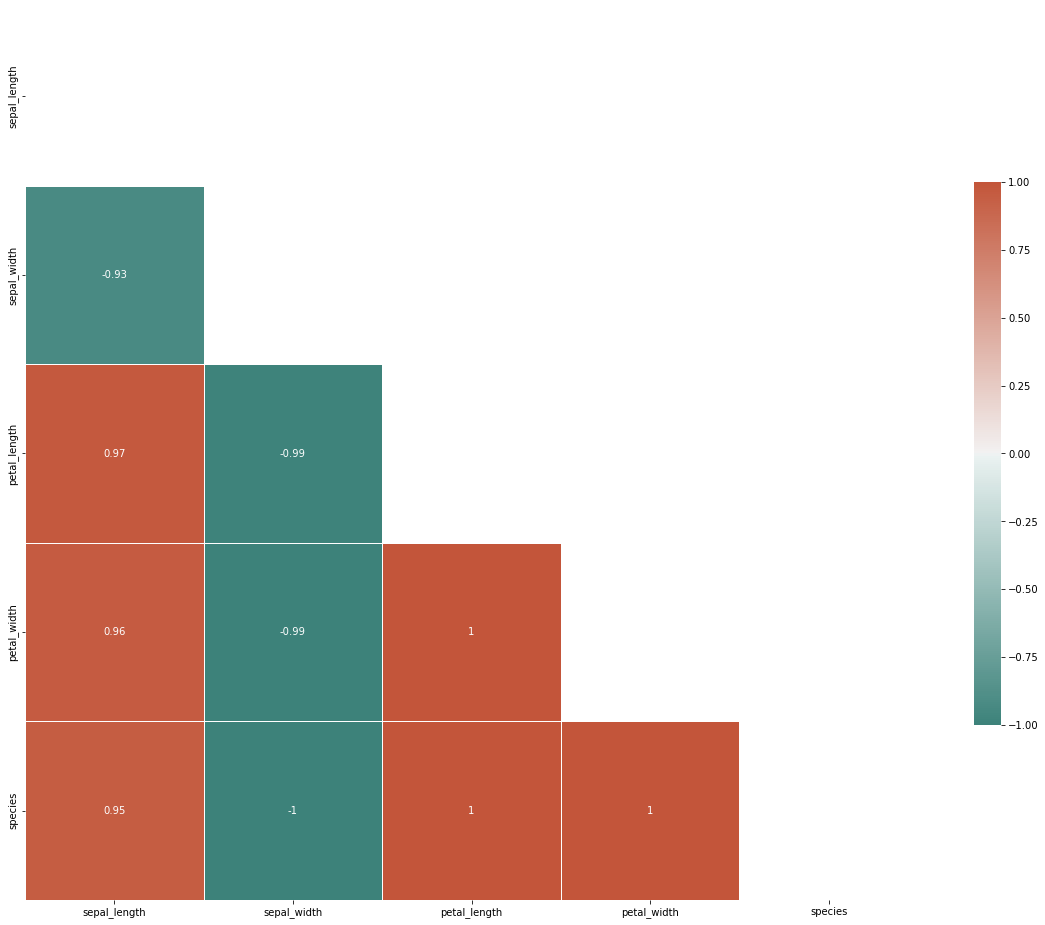

In [11]:
# Correction Matrix Plot (generic)

corr_matrix = iris.corr()
import matplotlib.pyplot as plt
import seaborn as sns

correlation = corr_matrix.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [12]:
# Brute Force Method to find Correlation between features
def correlation(iris, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = iris.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
correlated_features = correlation(iris, threshold=0.8)
len(set(correlated_features))

3

In [14]:
len(correlated_features)
print(correlated_features)

{'petal_width', 'petal_length', 'species'}


#### We can't drop this as we have to predict target with these column only

In [15]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

####  No Missing Values are there.

In [16]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [17]:
# Let's split our data into train and test sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
                                                  
                                                  
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

# Model Training

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
model_rf = RandomForestClassifier(n_estimators=num_trees)
model_rf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

1.0